**Lab 2**

**Handling Missing Values**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler ,LabelEncoder,OneHotEncoder
import seaborn as sns
# from google.colab import drive 
# drive.mount('/content/drive')

In [ ]:
datasets = pd.read_csv('/content/drive/MyDrive/Data/Exercise-CarData.csv',index_col=0)
print(datasets)

      Price   Age     KM FuelType  ... Automatic    CC  Doors  Weight
0     13500  23.0  46986   Diesel  ...         0  2000  three    1165
1     13750  23.0  72937   Diesel  ...         0  2000      3    1165
2     13950  24.0  41711   Diesel  ...         0  2000      3    1165
3     14950  26.0  48000   Diesel  ...         0  2000      3    1165
4     13750  30.0  38500   Diesel  ...         0  2000      3    1170
...     ...   ...    ...      ...  ...       ...   ...    ...     ...
1431   7500   NaN  20544   Petrol  ...         0  1300      3    1025
1432  10845  72.0     ??   Petrol  ...         0  1300      3    1015
1433   8500   NaN  17016   Petrol  ...         0  1300      3    1015
1434   7250  70.0     ??      NaN  ...         0  1300      3    1015
1435   6950  76.0      1   Petrol  ...         0  1600      5    1114

[1436 rows x 10 columns]


In [ ]:
print("\nData statistics :\n",datasets.describe())


Data statistics :
               Price          Age  ...           CC      Weight
count   1436.000000  1336.000000  ...  1436.000000  1436.00000
mean   10730.824513    55.672156  ...  1566.827994  1072.45961
std     3626.964585    18.589804  ...   187.182436    52.64112
min     4350.000000     1.000000  ...  1300.000000  1000.00000
25%     8450.000000    43.000000  ...  1400.000000  1040.00000
50%     9900.000000    60.000000  ...  1600.000000  1070.00000
75%    11950.000000    70.000000  ...  1600.000000  1085.00000
max    32500.000000    80.000000  ...  2000.000000  1615.00000

[8 rows x 6 columns]


In [ ]:
X = datasets.iloc[:, :-1].values 
Y = datasets.iloc[:, -1].values 
print("\n\nInput : \n", X) 
print("\n\nOutput: \n", Y) 



Input : 
 [[13500 23.0 '46986' ... 0 2000 'three']
 [13750 23.0 '72937' ... 0 2000 '3']
 [13950 24.0 '41711' ... 0 2000 '3']
 ...
 [8500 nan '17016' ... 0 1300 '3']
 [7250 70.0 '??' ... 0 1300 '3']
 [6950 76.0 '1' ... 0 1600 '5']]


Output: 
 [1165 1165 1165 ... 1015 1015 1114]


In [ ]:
# Removing the row with all null values
datasets.dropna(axis=0,how='all',inplace=True)
print("New Data :\n\n",datasets)

New Data :

       Price   Age     KM FuelType  ... Automatic    CC  Doors  Weight
0     13500  23.0  46986   Diesel  ...         0  2000  three    1165
1     13750  23.0  72937   Diesel  ...         0  2000      3    1165
3     14950  26.0  48000   Diesel  ...         0  2000      3    1165
4     13750  30.0  38500   Diesel  ...         0  2000      3    1170
5     12950  32.0  61000   Diesel  ...         0  2000      3    1170
...     ...   ...    ...      ...  ...       ...   ...    ...     ...
1425   7950  80.0  50000   Petrol  ...         0  1300      4    1000
1429   8950  78.0  24000   Petrol  ...         1  1300      5    1065
1430   8450  80.0  23000   Petrol  ...         0  1300      3    1015
1432  10845  72.0  50000   Petrol  ...         0  1300      3    1015
1435   6950  76.0      1   Petrol  ...         0  1600      5    1114

[1111 rows x 10 columns]


In [ ]:
df = datasets;

df['Price'] = pd.to_numeric(df.Price.astype(str).str.replace(',',''), errors='coerce')
df['Price'] = df['Price'].fillna(df['Price'].mean())
df['Age']=df['Age'].fillna(df['Age'].mean())
df['KM'] = pd.to_numeric(df.KM.astype(str).str.replace(',',''), errors='coerce')
df['KM'] = df['KM'].fillna(df['KM'].mean())
df['HP'] = pd.to_numeric(df.HP.astype(str).str.replace(',',''), errors='coerce').fillna(90).astype(int)
df['MetColor'] = pd.to_numeric(df.MetColor.astype(str).str.replace(',',''), errors='coerce').fillna(1).astype(int)
df['Automatic'] = pd.to_numeric(df.Automatic.astype(str).str.replace(',',''), errors='coerce').fillna(0).astype(int)
df['CC'] = pd.to_numeric(df.CC.astype(str).str.replace(',',''), errors='coerce')
df['CC'] = df['CC'].fillna(df['CC'].mean())
df['Doors'] = pd.to_numeric(df.Doors.astype(str).str.replace(',',''), errors='coerce').fillna(4).astype(int)
df['Weight'] = pd.to_numeric(df.Weight.astype(str).str.replace(',',''), errors='coerce')
df['Weight'] = df['Weight'].fillna(df['Weight'].mean())

df

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,13500,23.0,46986,Diesel,90,1,0,2000,4,1165
1,13750,23.0,72937,Diesel,90,1,0,2000,3,1165
3,14950,26.0,48000,Diesel,90,0,0,2000,3,1165
4,13750,30.0,38500,Diesel,90,0,0,2000,3,1170
5,12950,32.0,61000,Diesel,90,0,0,2000,3,1170
...,...,...,...,...,...,...,...,...,...,...
1425,7950,80.0,50000,Petrol,86,1,0,1300,4,1000
1429,8950,78.0,24000,Petrol,86,1,1,1300,5,1065
1430,8450,80.0,23000,Petrol,86,0,0,1300,3,1015
1432,10845,72.0,50000,Petrol,86,0,0,1300,3,1015


**Data Transformation**

In [ ]:
# X = df.loc[:, df.columns!="FuelType"]
X = datasets.iloc[:, :-1].values 
Y = df.iloc[:, -1].values 

print("\n\nInput : \n", X) 
print("\n\nOutput: \n", Y) 

X_new = df.iloc[:,1:3].values
print("\n\nX for transformation : \n", X_new)



Input : 
 [[0.0e+00 1.0e+00 0.0e+00 ... 0.0e+00 2.0e+03 4.0e+00]
 [0.0e+00 1.0e+00 0.0e+00 ... 0.0e+00 2.0e+03 3.0e+00]
 [0.0e+00 1.0e+00 0.0e+00 ... 0.0e+00 2.0e+03 3.0e+00]
 ...
 [0.0e+00 0.0e+00 1.0e+00 ... 0.0e+00 1.3e+03 3.0e+00]
 [0.0e+00 0.0e+00 1.0e+00 ... 0.0e+00 1.3e+03 3.0e+00]
 [0.0e+00 0.0e+00 1.0e+00 ... 0.0e+00 1.6e+03 5.0e+00]]


Output: 
 [1165 1165 1165 ... 1015 1015 1114]


X for transformation : 
 [[2.3000e+01 4.6986e+04]
 [2.3000e+01 7.2937e+04]
 [2.6000e+01 4.8000e+04]
 ...
 [8.0000e+01 2.3000e+04]
 [7.2000e+01 5.0000e+04]
 [7.6000e+01 1.0000e+00]]


In [ ]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_new )
print("Scaled X : \n\n", X_scaled)

Scaled X : 

 [[0.27848101 0.19335471]
 [0.27848101 0.30014938]
 [0.3164557  0.19752756]
 ...
 [1.         0.09464648]
 [0.89873418 0.20575805]
 [0.94936709 0.        ]]


In [ ]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_new)
print("\n\nScaled X : \n", X_scaled)



Scaled X : 
 [[0.27848101 0.19335471]
 [0.27848101 0.30014938]
 [0.3164557  0.19752756]
 ...
 [1.         0.09464648]
 [0.89873418 0.20575805]
 [0.94936709 0.        ]]


**Handling Categorical Data**

In [ ]:
datasets = pd.read_csv('/content/drive/MyDrive/Data/Exercise-CarData.csv',index_col=0)
print("\nData :\n",datasets)


Data :
       Price   Age     KM FuelType  ... Automatic    CC  Doors  Weight
0     13500  23.0  46986   Diesel  ...         0  2000  three    1165
1     13750  23.0  72937   Diesel  ...         0  2000      3    1165
2     13950  24.0  41711   Diesel  ...         0  2000      3    1165
3     14950  26.0  48000   Diesel  ...         0  2000      3    1165
4     13750  30.0  38500   Diesel  ...         0  2000      3    1170
...     ...   ...    ...      ...  ...       ...   ...    ...     ...
1431   7500   NaN  20544   Petrol  ...         0  1300      3    1025
1432  10845  72.0     ??   Petrol  ...         0  1300      3    1015
1433   8500   NaN  17016   Petrol  ...         0  1300      3    1015
1434   7250  70.0     ??      NaN  ...         0  1300      3    1015
1435   6950  76.0      1   Petrol  ...         0  1600      5    1114

[1436 rows x 10 columns]


In [ ]:
le = LabelEncoder()
X[ : ,0] = le.fit_transform(X[ : ,0])
print("\n\nInput : \n", X) 



Input : 
 [[1.8e+01 1.0e+00 0.0e+00 ... 0.0e+00 2.0e+03 4.0e+00]
 [1.8e+01 1.0e+00 0.0e+00 ... 0.0e+00 2.0e+03 3.0e+00]
 [2.1e+01 1.0e+00 0.0e+00 ... 0.0e+00 2.0e+03 3.0e+00]
 ...
 [7.5e+01 0.0e+00 1.0e+00 ... 0.0e+00 1.3e+03 3.0e+00]
 [6.7e+01 0.0e+00 1.0e+00 ... 0.0e+00 1.3e+03 3.0e+00]
 [7.1e+01 0.0e+00 1.0e+00 ... 0.0e+00 1.6e+03 5.0e+00]]


In [ ]:
dummy = pd.get_dummies(datasets['FuelType'])
print("\n\nDummy :\n",dummy)



Dummy :
       CNG  Diesel  Petrol
0       0       1       0
1       0       1       0
2       0       1       0
3       0       1       0
4       0       1       0
...   ...     ...     ...
1431    0       0       1
1432    0       0       1
1433    0       0       1
1434    0       0       0
1435    0       0       1

[1436 rows x 3 columns]


In [ ]:
datasets = datasets.drop(['FuelType'],axis=1)
datasets = pd.concat([dummy,datasets],axis=1)
print("\n\nFinal Data :\n",datasets)



Final Data :
       CNG  Diesel  Petrol  Price  ...  Automatic    CC  Doors  Weight
0       0       1       0  13500  ...          0  2000  three    1165
1       0       1       0  13750  ...          0  2000      3    1165
2       0       1       0  13950  ...          0  2000      3    1165
3       0       1       0  14950  ...          0  2000      3    1165
4       0       1       0  13750  ...          0  2000      3    1170
...   ...     ...     ...    ...  ...        ...   ...    ...     ...
1431    0       0       1   7500  ...          0  1300      3    1025
1432    0       0       1  10845  ...          0  1300      3    1015
1433    0       0       1   8500  ...          0  1300      3    1015
1434    0       0       0   7250  ...          0  1300      3    1015
1435    0       0       1   6950  ...          0  1600      5    1114

[1436 rows x 12 columns]


In [110]:
onehotencoder = OneHotEncoder()
x = onehotencoder.fit_transform(datasets.Doors.values.reshape(-1,1)).toarray()
print(x)

[[0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


**Feature Selection Correlation**

In [115]:
data = pd.read_csv('/content/drive/MyDrive/Data/Exercise-CarData.csv') 
data.head()

,Unnamed: 0,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,0,13500,23.0,46986,Diesel,90,1.0,0,2000,three,1165
1,1,13750,23.0,72937,Diesel,90,1.0,0,2000,3,1165
2,2,13950,24.0,41711,Diesel,90,NaN,0,2000,3,1165
3,3,14950,26.0,48000,Diesel,90,0.0,0,2000,3,1165
4,4,13750,30.0,38500,Diesel,90,0.0,0,2000,3,1170


In [116]:
corr = data.corr()
corr.head()

,Unnamed: 0,Price,Age,MetColor,Automatic,CC,Weight
Unnamed: 0,1.000000,-0.738289,0.907090,-0.078616,0.066299,-0.184490,-0.414577
Price,-0.738289,1.000000,-0.878407,0.112041,0.033081,0.165067,0.581198
Age,0.907090,-0.878407,1.000000,-0.099659,0.032573,-0.120706,-0.464299
MetColor,-0.078616,0.112041,-0.099659,1.000000,-0.013973,0.029189,0.057142
Automatic,0.066299,0.033081,0.032573,-0.013973,1.000000,-0.069321,0.057249


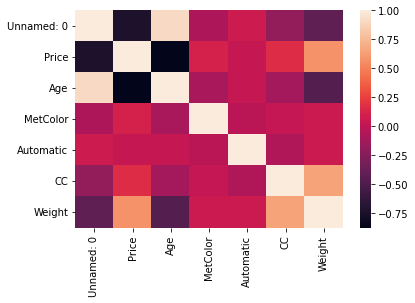

In [117]:
sns.heatmap(corr)

In [118]:
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False

In [120]:
selected_columns = data.columns[j+1]
print(selected_columns)

Automatic


In [121]:
data = data[selected_columns]
print(data)

0       0
1       0
2       0
3       0
4       0
       ..
1431    0
1432    0
1433    0
1434    0
1435    0
Name: Automatic, Length: 1436, dtype: int64
